# Working with the OutStruct object in naplib-python

This example shows some of the basic operations that can be performed on the OutStruct object. We first import an outstruct from a Matlab file, then process it.

In [1]:
import numpy as np

import naplib as nl
from naplib.io import import_outstruct

In [2]:
filepath = '../out_structs/out_sample_1.mat'
out = import_outstruct(filepath)

In [3]:
# Let's look at the data we have
print(len(out)) # number of trials/stimuli recorded
print(out.fields) # data fields available for each trial


19
['name', 'sound', 'soundf', 'dataf', 'duration', 'befaft', 'type', 'resp', 'artifact', 'trial', 'ti', 'label', 'reverb', 'prelabel', 'significant_elecs_from_bahars']


In [4]:
# we can index into the trials using integer indices, or index into the fields with a string
third_trial = out[2]
print(third_trial)
print()
name_field = out['name']
print(name_field)

{'name': 'stim03', 'sound': array([0., 0., 0., ..., 0., 0., 0.]), 'soundf': 11025, 'dataf': 99.99999999999999, 'duration': 64.29525000000001, 'befaft': array([1, 1], dtype=uint8), 'type': 'EEG', 'resp': array([[ 2.03776509e-01,  6.99868651e-01,  1.28057919e+00, ...,
         4.73146749e-01,  3.59776770e-01,  7.22036434e-01],
       [ 3.51946491e-01,  7.30796484e-01,  1.50252881e+00, ...,
         3.18944312e-01, -3.56117938e-04,  3.63176169e-01],
       [ 4.10893086e-01,  7.27030218e-01,  1.66888247e+00, ...,
         3.64803655e-01, -1.86325195e-01, -3.62754951e-02],
       ...,
       [-1.60245360e+00, -1.87219535e+00, -1.44771171e+00, ...,
        -2.48791655e-01, -2.42574412e-01, -2.11003905e-01],
       [-1.60308639e+00, -1.97499060e+00, -1.60956869e+00, ...,
        -6.47226712e-02,  1.85667538e-01,  9.88688960e-02],
       [-1.43953411e+00, -1.86309201e+00, -1.49261455e+00, ...,
         1.79246245e-02,  5.33343858e-01,  2.63299957e-01]]), 'artifact': array([], shape=(0, 0), dty

In [5]:
# we can also extract a smaller OutStruct object which contains only a set of the
# fields by indexing a list of fieldnames
smaller_out = out[['name','soundf','resp']]
print(smaller_out)

OutStruct of 19 trials containing 3 fields
[{"name": <class 'str'>, "soundf": <class 'int'>, "resp": <class 'numpy.ndarray'>}
{"name": <class 'str'>, "soundf": <class 'int'>, "resp": <class 'numpy.ndarray'>}

...
{"name": <class 'str'>, "soundf": <class 'int'>, "resp": <class 'numpy.ndarray'>}]


In [6]:
# we can also extract a smaller OutStruct by indexing with slicing
# or a list of trial indices
smaller_out2 = out[[0,2,4,9]]
print(smaller_out2)
print()
smaller_out3 = out[1:5]
print(smaller_out3)

OutStruct of 4 trials containing 15 fields
[{"name": <class 'str'>, "sound": <class 'numpy.ndarray'>, "soundf": <class 'int'>, "dataf": <class 'int'>, "duration": <class 'float'>, "befaft": <class 'numpy.ndarray'>, "type": <class 'str'>, "resp": <class 'numpy.ndarray'>, "artifact": <class 'numpy.ndarray'>, "trial": <class 'int'>, "ti": <class 'numpy.ndarray'>, "label": <class 'numpy.ndarray'>, "reverb": <class 'numpy.ndarray'>, "prelabel": <class 'numpy.ndarray'>, "significant_elecs_from_bahars": <class 'numpy.ndarray'>}
{"name": <class 'str'>, "sound": <class 'numpy.ndarray'>, "soundf": <class 'int'>, "dataf": <class 'float'>, "duration": <class 'float'>, "befaft": <class 'numpy.ndarray'>, "type": <class 'str'>, "resp": <class 'numpy.ndarray'>, "artifact": <class 'numpy.ndarray'>, "trial": <class 'int'>, "ti": <class 'numpy.ndarray'>, "label": <class 'numpy.ndarray'>, "reverb": <class 'numpy.ndarray'>, "prelabel": <class 'numpy.ndarray'>, "significant_elecs_from_bahars": <class 'numpy

In [7]:
# We can also iterate over the trials and get interesting information
for t, trial in enumerate(out[:3]): # only look at the first 3 trials
    print(f'trial {t}-----')
    print(type(trial)) # each trial is a dictionary object
    print(trial['name']) # we can access a single field of this trial, like the name


trial 0-----
<class 'dict'>
stim01
trial 1-----
<class 'dict'>
stim02
trial 2-----
<class 'dict'>
stim03


In [8]:
# we can also access a single field of all the trials by using out.get_field(), or just brackets
print([resp.shape for resp in out.get_field('resp')]) # shape of each trial: (time * num_elecs)
print([resp.shape for resp in out['resp']]) # equivalent to above


[(6197, 30), (5203, 30), (6430, 30), (6206, 30), (6560, 30), (7194, 30), (8540, 30), (6586, 30), (5904, 30), (5621, 30), (8707, 30), (7602, 30), (4977, 30), (3751, 30), (3485, 30), (3778, 30), (2979, 30), (2986, 30), (448, 30)]
[(6197, 30), (5203, 30), (6430, 30), (6206, 30), (6560, 30), (7194, 30), (8540, 30), (6586, 30), (5904, 30), (5621, 30), (8707, 30), (7602, 30), (4977, 30), (3751, 30), (3485, 30), (3778, 30), (2979, 30), (2986, 30), (448, 30)]


In [9]:
# We can also join different subjects data, such as concatenating their "resp"
# fields together to get the responses to all subjects' electrodes
filepath = '../out_structs/out_sample_2.mat'
out_other = import_outstruct(filepath)
print("this subject has {} electrodes...".format(out_other['resp'][0].shape[1])) # dimensions of 


# join the "resp" fields, now we have all electrodes data together
joined_responses = nl.join_fields([out, out_other], fieldname='resp', axis=-1)
print('after concatenating, each trial has shape:')
print([resp.shape for resp in joined_responses])


this subject has 30 electrodes...
after concatenating, each trial has shape:
[(6197, 60), (5203, 60), (6430, 60), (6206, 60), (6560, 60), (7194, 60), (8540, 60), (6586, 60), (5904, 60), (5621, 60), (8707, 60), (7602, 60), (4977, 60), (3751, 60), (3485, 60), (3778, 60), (2979, 60), (2986, 60), (448, 60)]


If we have some more data, labels, or something that we want to store in our OutStruct as well, we can add a field to the OutStruct. To add a field, you must pass in either a list of the same length as the OutStruct which contains the data for this field for each trial, or a multidimensional array where the first index is the length of the OutStruct

In [10]:
# for example, let's add a new name for each and call the field "test_name"
new_field_data = [f'test{i}' for i in range(19)]
out.set_field(new_field_data, fieldname='test_name')
print(out.fields) # now we have a new field
print(out[0]['test_name']) # let's print the data in this field for the first trial

['name', 'sound', 'soundf', 'dataf', 'duration', 'befaft', 'type', 'resp', 'artifact', 'trial', 'ti', 'label', 'reverb', 'prelabel', 'significant_elecs_from_bahars', 'test_name']
test0


### Processing an OutStruct

In [11]:
# now let's zscore the response data over time (and across all trials)
from naplib.preprocessing import normalize

norm_resp = normalize(outstruct=out, data='resp', axis=0, method='zscore')


In [12]:
# we can also directly pass in the field as the data

norm_resp2 = normalize(data=out.get_field('resp'), axis=0, method='zscore')


In [13]:
# print out the standard deviation before and after normalization
# Note: the standard dev. is not exactly 1 because it was computed over the full out struct,
# not for each trial individually

print(out[0]['resp'].std(axis=0))
print(norm_resp[0].std(axis=0))
print(norm_resp2[0].std(axis=0))

[0.82153982 1.13056419 1.46729383 1.63991529 1.80746745 1.6620427
 1.49965842 1.54505928 1.47529691 1.35430757 1.23219641 1.25273965
 1.30835683 0.95506827 0.82565716 0.74135743 0.8675098  1.09265345
 1.18879407 1.26099978 1.24296696 1.20067893 1.51760834 1.74466428
 1.94255046 1.80243959 1.20675949 0.88059825 0.90514038 1.09985971]
[0.82046506 0.96945641 1.07992902 1.11316762 1.11249377 1.07419394
 1.02577959 1.06583431 1.11442683 1.12698377 1.08298257 1.08600933
 1.07794006 0.92745478 0.91390538 0.86545181 0.95008439 1.03271206
 1.03436409 1.00737443 1.045131   1.03296959 1.13533031 1.12382104
 1.15945381 1.1279667  1.05699912 0.97674993 0.97234702 1.01658648]
[0.82046506 0.96945641 1.07992902 1.11316762 1.11249377 1.07419394
 1.02577959 1.06583431 1.11442683 1.12698377 1.08298257 1.08600933
 1.07794006 0.92745478 0.91390538 0.86545181 0.95008439 1.03271206
 1.03436409 1.00737443 1.045131   1.03296959 1.13533031 1.12382104
 1.15945381 1.1279667  1.05699912 0.97674993 0.97234702 1.016

In [14]:
# looks good, so let's replace the 'resp' field in our outstruct with this new normalized resp
out['resp'] = norm_resp
print(out[0]['resp'].std(axis=0)) # now the normalized data is in the 'resp' field

[0.82046506 0.96945641 1.07992902 1.11316762 1.11249377 1.07419394
 1.02577959 1.06583431 1.11442683 1.12698377 1.08298257 1.08600933
 1.07794006 0.92745478 0.91390538 0.86545181 0.95008439 1.03271206
 1.03436409 1.00737443 1.045131   1.03296959 1.13533031 1.12382104
 1.15945381 1.1279667  1.05699912 0.97674993 0.97234702 1.01658648]


### Segmenting responses based on transitions between different labels

In this task, the noise in the background changed every 3-6 seconds. The current noise in the background is given by the "label" field of the outstruct. We can use this field to segment the responses around the label changes.

In [15]:
from naplib.segmentation import segment_around_label_transitions

# segment and return chunks with 50 samples before the transition and 300 samples after
resp_segments, labels, prior_labels = segment_around_label_transitions(outstruct=out, data='resp',
                                                                       labels='label', prechange_samples=50,
                                                                       postchange_samples=300)


In [16]:
# let's look at what we have
print(resp_segments.shape) # num_segments * time * electrodes
print(labels.shape) # num_segments,
print(prior_labels.shape) # num_segments,

(310, 350, 30)
(310,)
(310,)


### Visualization with shadederrorplot

Let's make a quick plot of the average response over all electrodes to the transitions, and to a specific transition type

In [17]:
import matplotlib.pyplot as plt
from naplib.visualization import shadederrorplot

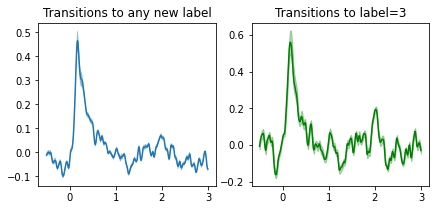

In [18]:
fig, axes = plt.subplots(1,2,figsize=(7,3))

x = np.linspace(-0.5, 3, 350)

# average over all transitions and input the time-by-electrodes data
shadederrorplot(x, resp_segments.mean(0), ax=axes[0])
axes[0].set_title('Transitions to any new label')

# now, average over all the transitions to just one label type
# change some parameters for second plot
plt_args = {'color': 'g'}
shade_args = {'color': 'g', 'alpha': 0.3}
shadederrorplot(x, resp_segments[labels==3].mean(0), plt_args=plt_args, shade_args=shade_args, ax=axes[1])
axes[1].set_title('Transitions to label=3')

plt.show()

